<a href="https://colab.research.google.com/github/kimjis92/TIL/blob/master/imgrecog_dense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
import os
import glob

In [63]:
!pip install opencv-python

In [0]:
from keras.applications.densenet import DenseNet121
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.preprocessing import image

In [20]:
from google.colab import drive

drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [21]:
os.getcwd()

'/content'

In [80]:
conv_base=DenseNet121(weights='imagenet', #체크포인트  ex) imagenet에서 미리 학습시킨 가중치 사용
               include_top=False, #최상위 완전연결 분류기 포함할지 안할지 결정
               input_shape=((256, 256, 3))) # 아무것도 지정하지 않으면 어떤 크기의 입력도 처리 가능

29089792/29084464 [==============================] - 3s 0us/step


In [81]:
model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
# model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 8, 8, 1024)        7037504   
_________________________________________________________________
flatten_2 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 131074    
Total params: 7,168,578
Trainable params: 7,084,930
Non-trainable params: 83,648
_________________________________________________________________


In [0]:
pu='/content/gdrive/My Drive/이미지 인식 멀캠 프로젝트/exp'
print(os.listdir(pu))

['슬픔', '피곤함', 'gi', 'mu']


In [0]:
gipass='/content/gdrive/My Drive/이미지 인식 멀캠 프로젝트/exp/gi'
mupass='/content/gdrive/My Drive/이미지 인식 멀캠 프로젝트/exp/mu'

x=[]
y=[]
gi=glob.glob(gipass+'/*.png')
mu=glob.glob(mupass+'/*.png')
for k in gi :
  o=image.load_img(k, target_size=(256, 256))
  p=image.img_to_array(o)
  p=p/255
  x.append(p)
  y.append(0)

for k in mu :
  o=image.load_img(k, target_size=(256, 256))
  p=image.img_to_array(o)
  p=p/255
  x.append(p)
  y.append(1)



In [0]:
for i in range(len(y)):
  if y[i]=='gi' :
    y[i]=0
  elif y[i]=='mu' :
    y[i]=1

In [0]:
x=np.array(x)
y=np.array(y)

In [0]:
y.shape

(1400,)

In [0]:
y=to_categorical(y)
train_x, test_x, train_y, test_y =train_test_split(x, y, test_size=0.2)

In [0]:
from keras.optimizers import adam

In [83]:
model.compile(loss='categorical_crossentropy', optimizer=adam(lr=0.00001), metrics=['acc'])
history=model.fit(train_x, train_y, epochs=20, validation_split=0.25, batch_size=8)

Train on 840 samples, validate on 280 samples
Epoch 1/20
840/840 [==============================] - 61s 72ms/step - loss: 0.7107 - acc: 0.7143 - val_loss: 0.5207 - val_acc: 0.7893
Epoch 2/20
840/840 [==============================] - 21s 25ms/step - loss: 0.1729 - acc: 0.9321 - val_loss: 0.3231 - val_acc: 0.8536
Epoch 3/20
840/840 [==============================] - 21s 25ms/step - loss: 0.0686 - acc: 0.9786 - val_loss: 0.2651 - val_acc: 0.8929
Epoch 4/20
840/840 [==============================] - 21s 25ms/step - loss: 0.0314 - acc: 0.9976 - val_loss: 0.2413 - val_acc: 0.9036
Epoch 5/20
840/840 [==============================] - 21s 25ms/step - loss: 0.0283 - acc: 0.9976 - val_loss: 0.2371 - val_acc: 0.9000
Epoch 6/20
840/840 [==============================] - 21s 25ms/step - loss: 0.0186 - acc: 1.0000 - val_loss: 0.2224 - val_acc: 0.9036
Epoch 7/20
840/840 [==============================] - 21s 25ms/step - loss: 0.0196 - acc: 0.9952 - val_loss: 0.1941 - val_acc: 0.9214
Epoch 8/20
840/8

In [84]:
score=model.evaluate(test_x, test_y)
print(score)

280/280 [==============================] - 5s 16ms/step
[0.16897252202033997, 0.942857141154153]


In [0]:
model.save("/content/gdrive/My Drive/이미지 인식 멀캠 프로젝트/facerecog_densenet_weight.h5")

In [0]:
picpath='/content/gdrive/My Drive/이미지 인식 멀캠 프로젝트/pre'
pic=glob.glob(picpath+'/*.png')

In [87]:
pic

['/content/gdrive/My Drive/이미지 인식 멀캠 프로젝트/pre/21271.png',
 '/content/gdrive/My Drive/이미지 인식 멀캠 프로젝트/pre/21804.png',
 '/content/gdrive/My Drive/이미지 인식 멀캠 프로젝트/pre/21269.png',
 '/content/gdrive/My Drive/이미지 인식 멀캠 프로젝트/pre/21270.png',
 '/content/gdrive/My Drive/이미지 인식 멀캠 프로젝트/pre/21304.png',
 '/content/gdrive/My Drive/이미지 인식 멀캠 프로젝트/pre/21302.png',
 '/content/gdrive/My Drive/이미지 인식 멀캠 프로젝트/pre/21300.png',
 '/content/gdrive/My Drive/이미지 인식 멀캠 프로젝트/pre/21299.png',
 '/content/gdrive/My Drive/이미지 인식 멀캠 프로젝트/pre/21294.png',
 '/content/gdrive/My Drive/이미지 인식 멀캠 프로젝트/pre/21298.png',
 '/content/gdrive/My Drive/이미지 인식 멀캠 프로젝트/pre/21292.png',
 '/content/gdrive/My Drive/이미지 인식 멀캠 프로젝트/pre/21287.png',
 '/content/gdrive/My Drive/이미지 인식 멀캠 프로젝트/pre/21282.png',
 '/content/gdrive/My Drive/이미지 인식 멀캠 프로젝트/pre/21765.png',
 '/content/gdrive/My Drive/이미지 인식 멀캠 프로젝트/pre/21752.png',
 '/content/gdrive/My Drive/이미지 인식 멀캠 프로젝트/pre/21740.png',
 '/content/gdrive/My Drive/이미지 인식 멀캠 프로젝트/pre/21497.png',
 '/content/gdr

In [0]:
ypre=[0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1]

In [0]:
xpre=[]

for i, k in enumerate(pic) :
  o=image.load_img(k, target_size=(256, 256))
  p=image.img_to_array(o)
  p=p/255
  xpre.append(p)

xpre=np.array(xpre)

In [0]:
fo=model.predict(xpre)

In [0]:
fpre=[]

In [92]:
for k in fo :
  fpre.append(np.argmax(k))

fpre

[0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0]

In [93]:
error=[]

for i in range(len(fpre)):
  if fpre[i] !=ypre[i]:
    error.append(i)

error

[8, 19]

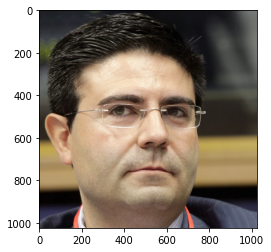

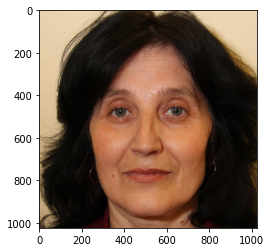

In [94]:
import cv2
from matplotlib import pyplot as plt


for i in error:
  img=cv2.imread(pic[i], cv2.IMREAD_UNCHANGED)    #cv2.imread(pic[i], cv2.IMREAD_COLOR) 하면 원본색이랑 다른 파란색으로 나옴 원본은 BGR 여기는 RGB

  b, g, r=cv2.split(img)
  img2=cv2.merge([r, g, b])

  # 구글코랩에서는 안됨 plt 써야됨
  # cv2.imshow('Image', img)
  plt.imshow(img2)
  plt.show()
  


1
19


In [61]:
pic[1]

'/content/gdrive/My Drive/이미지 인식 멀캠 프로젝트/pre/21804.png'